In [8]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

#### Dataset
https://www.kaggle.com/shaistashaikh/carprice-assignment

In [2]:
car_data = pd.read_csv('datasets/CarPrice_Assignment.csv')

car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Shape of the data

In [3]:
car_data.shape

(205, 26)

#### Info data

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Describe the data

In [5]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


#### Exploring the data with plots
* From the below plots, we can understand how the price is distributed

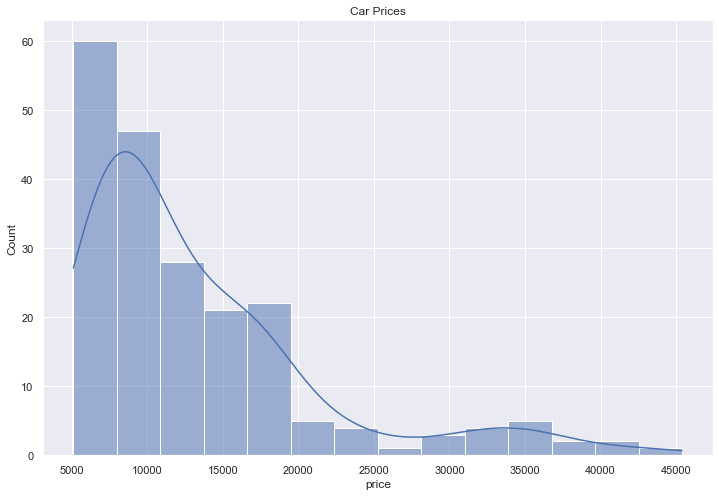

In [9]:
plt.figure(figsize=(12, 8))

sns.histplot(data=car_data, x='price', kde=True)

plt.title("Car Prices")

plt.show()

* Now let's see that how fuel type is distributed

Text(0.5, 1.0, 'Car Price by Fuel Type')

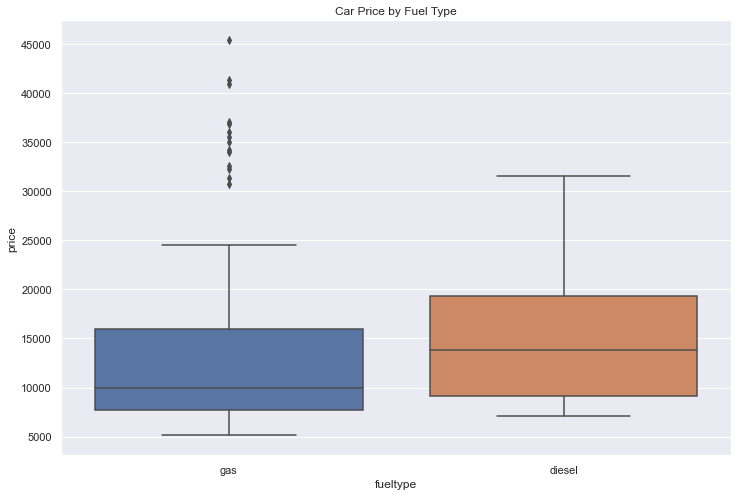

In [10]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=car_data, x='fueltype', y='price')

plt.title('Car Price by Fuel Type')

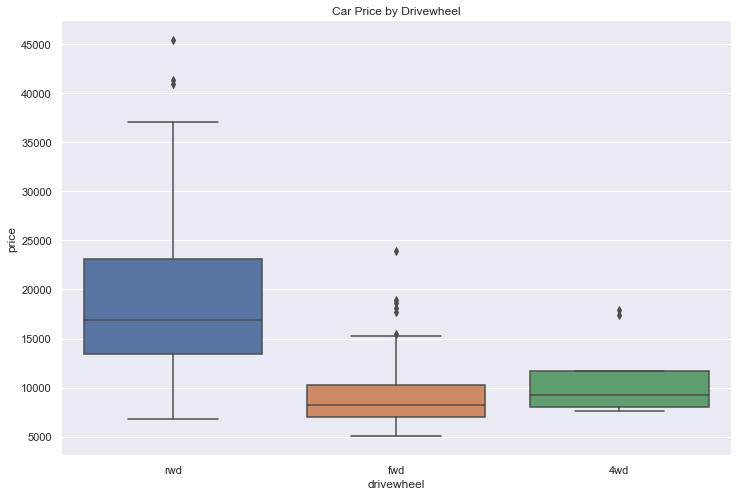

In [11]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=car_data, x='drivewheel', y='price')

plt.title('Car Price by Drivewheel')

plt.show()

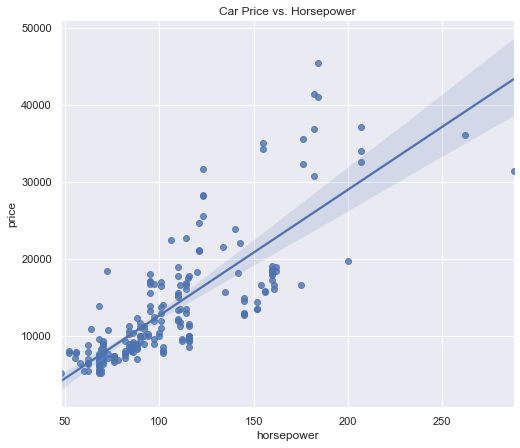

In [12]:
sns.lmplot(data=car_data, x='horsepower', y='price', height=6, aspect=1.2)

plt.title('Car Price vs. Horsepower')

plt.show()

#### Divide the dataset into x and y

* Extract the values and keep it in different variables

In [17]:
car_data = car_data.sample(frac=1).reset_index(drop=True)

car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,144,0,subaru baja,gas,std,four,sedan,fwd,front,97.2,...,108,mpfi,3.62,2.64,9.0,94,5200,26,32,9960.000
1,152,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.000
2,137,3,saab 99gle,gas,turbo,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18150.000
3,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167
4,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000


In [23]:
x = car_data['horsepower']

y = car_data['price']

In [24]:
x = sm.add_constant(x)

x.head()

,const,horsepower
0,1.0,94
1,1.0,62
2,1.0,160
3,1.0,160
4,1.0,110


In [25]:
train_size = int(0.8 * len(x))

x_train_set = x[:train_size]
y_train_set = y[:train_size]

x_test_set = x[train_size:]
y_test_set = y[train_size:]

In [26]:
x_train_set.shape, x_test_set.shape

((164, 2), (41, 2))

In [27]:
y_train_set.shape, y_test_set.shape

((164,), (41,))

OLS is a statistical measure of how well the regression line fits the data. Adjusted R-squared actually adjusts the statistics based on the number of independent variables present. The ratio of deviation of the estimated value of a parameter from its hypothesized value to its standard error is called t-statistic

In [28]:
model = sm.OLS(y_train_set, x_train_set).fit()

model

* model shows that how the data dependant on the other. 
* Model summary. The model summary table reports the strength of the relationship between the model and the dependent variable. R, the multiple correlation coefficient, is the linear correlation between the observed and model-predicted values of the dependent variable. Its large value indicates a strong relationship.
* Here the rsquare value was high, means the dependancy between two variables are high

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     301.5
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           8.04e-39
Time:                        15:20:19   Log-Likelihood:                -1617.8
No. Observations:                 164   AIC:                             3240.
Df Residuals:                     162   BIC:                             3246.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4924.6422   1088.166     -4.526      0.000   -7073.461   -2775.824
horsepower   174.9987     10.078     17.365      0.000     155.098     194.899
==============================================================================
Omnibus:                       36.073   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.971
Skew:                           1.055   Prob(JB):                     7.79e-15
Kurtosis:                       5.248   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Residual Plots for Horsepower

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

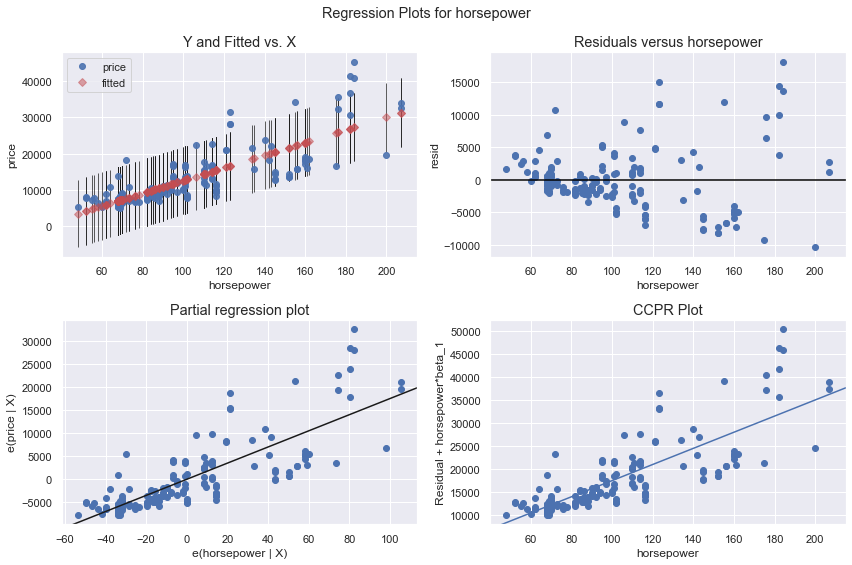

In [31]:
fig = plt.figure(figsize=(12, 8))

fig = sm.graphics.plot_regress_exog(model, 'horsepower', fig=fig)

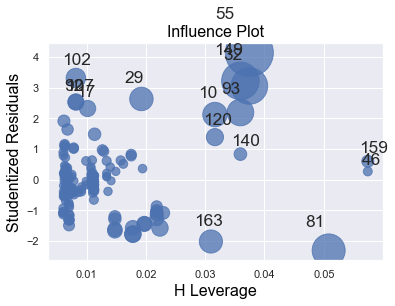

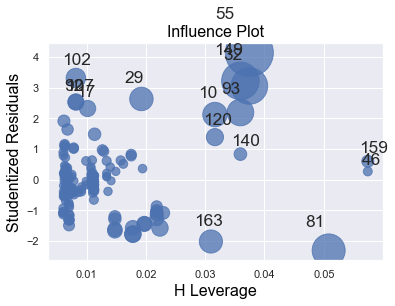

In [55]:
sm.graphics.influence_plot(model)

* Using predict method, we are predicting the values using test data

In [38]:
y_pred = model.predict(x_test_set)

y_pred.head()

164     6975.268042
165    15200.206023
166    22025.154560
167    16600.195466
168    10475.241651
dtype: float64

* Let's plot the data , here scatter data is for knowing how much data had spread
* While we are plotting the fit line also to see how much the prediction is right

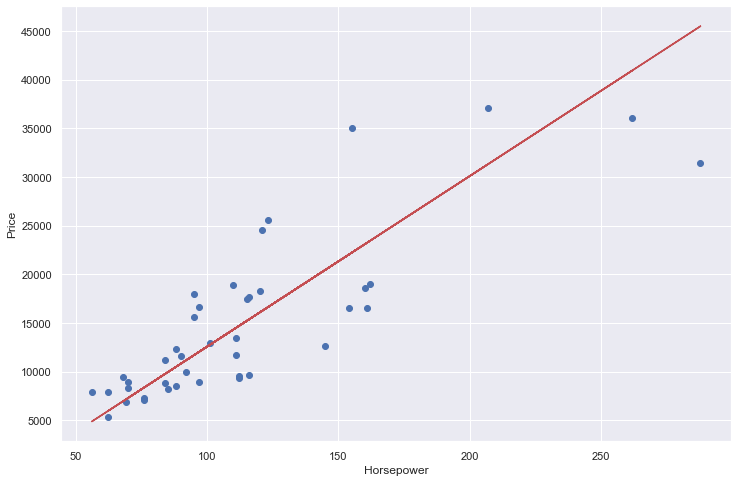

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test_set['horsepower'], y_test_set)
plt.plot(x_test_set['horsepower'], y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Price')

plt.show()

In [53]:
from sklearn.metrics import r2_score

r2_score(y_test_set, y_pred)

0.6293001512343126